###  Forecast the CocaCola prices and Airlines Passengers data set. 
Prepare a document for each model explaining 
how many dummy variables you have created and RMSE value for each model. Finally which model you will use for 
Forecasting.


## Forecast the CocaCola prices

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
coco = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')

In [3]:
coco.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [4]:
quarter=['Q1','Q2','Q3','Q4']
n=coco['Quarter'][0]
n[0:2]


'Q1'

In [5]:
coco['quarter']=0

In [6]:
for i in range(42):
    n=coco['Quarter'][i]
    coco['quarter'][i]=n[0:2]

In [7]:
dummy=pd.DataFrame(pd.get_dummies(coco['quarter']))

In [8]:
dummy.head()

,Q1,Q2,Q3,Q4
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0


In [9]:
coc=pd.concat((coco,dummy),axis=1)

In [10]:
coc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,Q1,1,0,0,0
1,Q2_86,2244.960999,Q2,0,1,0,0
2,Q3_86,2533.804993,Q3,0,0,1,0
3,Q4_86,2154.962997,Q4,0,0,0,1
4,Q1_87,1547.818996,Q1,1,0,0,0
5,Q2_87,2104.411995,Q2,0,1,0,0
6,Q3_87,2014.362999,Q3,0,0,1,0
7,Q4_87,1991.746998,Q4,0,0,0,1
8,Q1_88,1869.049999,Q1,1,0,0,0
9,Q2_88,2313.631996,Q2,0,1,0,0


In [11]:
t= np.arange(1,43)

In [12]:
coc['t']=t

In [13]:
coc['t_square']=coc['t']*coc['t']

In [14]:
coc

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100


In [15]:
log_Sales=np.log(coc['Sales'])

In [16]:
log_Sales.head()

0    7.458663
1    7.716443
2    7.837477
3    7.675529
4    7.344602
Name: Sales, dtype: float64

In [17]:
coc['log_Sales']=log_Sales

In [18]:
coc.head()

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602


In [19]:
train= coc.head(38)
test=coc.tail(4)

<AxesSubplot:>

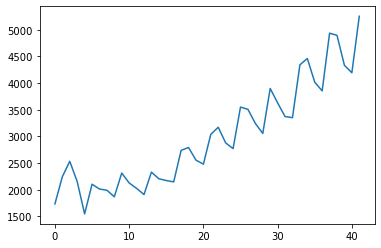

In [20]:
coc.Sales.plot()

###### Linear model

In [21]:
import statsmodels.formula.api as smf

In [22]:
linear_model = smf.ols('Sales~t', data= train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(test['t'])))

In [23]:
rmse_linear = np.sqrt(np.mean((np.mean(test['Sales'])- np.array(pred_linear))**2))
rmse_linear

427.99939109006056

###### Exponential model

In [24]:
exp = smf.ols('log_Sales~t', data = train).fit()
pred_exp = pd.Series(exp.predict(pd.DataFrame(test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

466.2479731067161

###### Quadratic model

In [25]:
quad = smf.ols('Sales~t + t_square', data = train).fit()
pred_quad = pd.Series(quad.predict(test[['t','t_square']]))
rmse_quad = np.sqrt(np.mean((np.array(test['Sales']) - np.array(pred_quad))**2))
rmse_quad

475.5618351831504

###### Additive Seasonality with linear trend

In [26]:
add_sea = smf.ols('Sales~ Q1 + Q2 + Q3 + Q4', data = train).fit()
pred_add_sea = pd.Series(add_sea.predict(test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea =np.sqrt(np.mean((np.array(test['Sales']) - np.array(pred_add_sea))**2))
rmse_add_sea

1860.0238154547274

###### Additive seasonality with quadratic trend

In [27]:
add_quad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_add_quad=pd.Series(add_quad.predict(pd.DataFrame(test[['t','t_square','Q1','Q2','Q3','Q4']])))
rmse_add_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(pred_add_quad))**2))
rmse_add_quad

301.73800719347435

###### Multiplicative seasonality

In [28]:
mul_sea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
pred_mul= pd.Series(mul_sea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmse_mul= np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul)))**2))
rmse_mul

1963.3896400779681

###### Multiplicative seasonality with linear trend

In [29]:
mul_lin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_lin= pd.Series(mul_lin.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
rmse_mulin=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_lin)))**2))
rmse_mulin


225.52439049828402

###### Multiplicative seasonality with quadratic trend

In [30]:
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

581.8457187958758

In [31]:
data={'Model':pd.Series(['rmse_mul_quad','rmse_mulin', 'rmse_mul','rmse_add_quad', 'rmse_add_quad', 'rmse_add_sea','rmse_quad','rmse_exp']),'Values':pd.Series([rmse_mul_quad,rmse_mulin, rmse_mul,rmse_add_quad, rmse_add_quad, rmse_add_sea,rmse_quad,rmse_exp])}
data


{'Model': 0    rmse_mul_quad
 1       rmse_mulin
 2         rmse_mul
 3    rmse_add_quad
 4    rmse_add_quad
 5     rmse_add_sea
 6        rmse_quad
 7         rmse_exp
 dtype: object,
 'Values': 0     581.845719
 1     225.524390
 2    1963.389640
 3     301.738007
 4     301.738007
 5    1860.023815
 6     475.561835
 7     466.247973
 dtype: float64}

In [32]:
Rmse=pd.DataFrame(data)
Rmse

,Model,Values
0,rmse_mul_quad,581.845719
1,rmse_mulin,225.524390
2,rmse_mul,1963.389640
3,rmse_add_quad,301.738007
4,rmse_add_quad,301.738007
5,rmse_add_sea,1860.023815
6,rmse_quad,475.561835
7,rmse_exp,466.247973


###### Final model with least rmse value

In [40]:
final= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=coc).fit()
pred= pd.Series(final.predict(coc))
actual_pred = np.exp(pred)
actual_pred

0     1539.516800
1     1958.133190
2     1941.716476
3     1792.297460
4     1695.770302
5     2156.874230
6     2138.791299
7     1974.206976
8     1867.882779
9     2375.786523
10    2355.868262
11    2174.579427
12    2057.463839
13    2616.917354
14    2594.977486
15    2395.288712
16    2266.286458
17    2882.521797
18    2858.355139
19    2638.398921
20    2496.303563
21    3175.083806
22    3148.464349
23    2906.183639
24    2749.666290
25    3497.339441
26    3468.018239
27    3201.147210
28    3028.744108
29    3852.302464
30    3820.005302
31    3526.048155
32    3336.146973
33    4243.292516
34    4207.717347
35    3883.924973
36    3674.749740
37    4673.966165
38    4634.780289
39    4278.124557
40    4047.719050
41    5148.351104
dtype: float64

## Forecast the Airlines Passengers 

In [45]:
from matplotlib import pyplot

In [61]:
data = pd.read_excel('Airlines+Data.xlsx',header=0, index_col=0, parse_dates=True)
data

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [50]:
import itertools
import statsmodels.api as sm

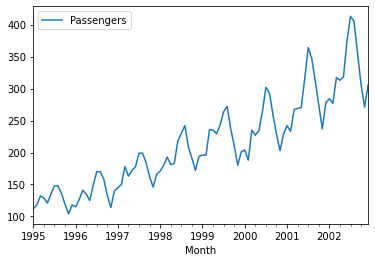

In [51]:
data.plot()
pyplot.show()

array([[<AxesSubplot:title={'center':'Passengers'}>]], dtype=object)

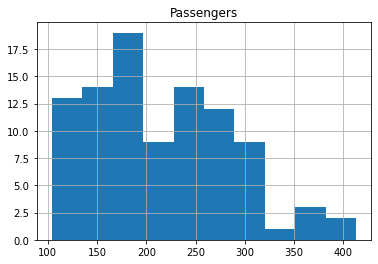

In [52]:
data.hist()

<AxesSubplot:ylabel='Density'>

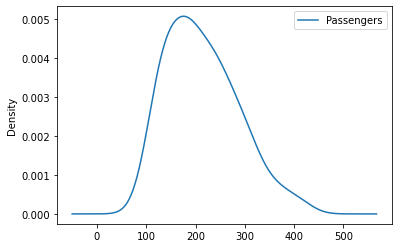

In [53]:
data.plot(kind = 'kde')

In [64]:
# separate out a validation dataset
split_point = len(data) - 10
dataset, validation = data[0:split_point], data[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_excel('dataset.xlsx', header=False)
validation.to_excel('validation.xlsx', header=False)

Dataset 86, Validation 10


### Persistance / base model

In [75]:
# evaluate a persistance model
from sklearn.metrics import mean_squared_error
from math import sqrt

In [73]:
# load data
train = pd.read_excel('dataset.xlsx', header = None, index_col = 0 , parse_dates = True, squeeze = True)
# Prepare data
X = train.values
X = x.astype('float32')
train_size = int(len(X)*0.50)
train,test = X[0:train_size], X[train_size:]

In [76]:
# data validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# Observations
    obs = test[i]
    print('> Prdicted = %.3f, Expected = %.3f' % (yhat,obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

> Prdicted = 230.000, Expected = 242.000
> Prdicted = 230.000, Expected = 209.000
> Prdicted = 230.000, Expected = 191.000
> Prdicted = 230.000, Expected = 172.000
> Prdicted = 230.000, Expected = 194.000
> Prdicted = 230.000, Expected = 196.000
> Prdicted = 230.000, Expected = 196.000
> Prdicted = 230.000, Expected = 236.000
> Prdicted = 230.000, Expected = 235.000
> Prdicted = 230.000, Expected = 229.000
> Prdicted = 230.000, Expected = 243.000
> Prdicted = 230.000, Expected = 264.000
> Prdicted = 230.000, Expected = 272.000
> Prdicted = 230.000, Expected = 237.000
> Prdicted = 230.000, Expected = 211.000
> Prdicted = 230.000, Expected = 180.000
> Prdicted = 230.000, Expected = 201.000
> Prdicted = 230.000, Expected = 204.000
> Prdicted = 230.000, Expected = 188.000
> Prdicted = 230.000, Expected = 235.000
> Prdicted = 230.000, Expected = 227.000
> Prdicted = 230.000, Expected = 234.000
> Prdicted = 230.000, Expected = 264.000
> Prdicted = 230.000, Expected = 302.000
> Prdicted = 230

### ARIMA Hyperameters

In [77]:
# grid search ARIMA parameters for a time series
from statsmodels.tsa.arima_model import ARIMA

In [95]:
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

###  Grid search for p,d,q values

In [96]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [97]:
# load dataser
train= pd.read_excel('dataset.xlsx', header = None , index_col =0, parse_dates = True, squeeze =True)
# evaluate parameters
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=78.563
ARIMA(0, 0, 1) RMSE=44.789
ARIMA(0, 1, 0) RMSE=25.903
ARIMA(0, 1, 1) RMSE=25.355
ARIMA(0, 1, 2) RMSE=27.772
ARIMA(0, 2, 0) RMSE=32.474
ARIMA(0, 2, 1) RMSE=26.640
ARIMA(0, 2, 2) RMSE=25.942
ARIMA(1, 0, 0) RMSE=26.036
ARIMA(1, 0, 1) RMSE=25.282
ARIMA(1, 0, 2) RMSE=520.374
ARIMA(1, 1, 0) RMSE=25.679
ARIMA(1, 2, 0) RMSE=31.603
ARIMA(2, 0, 0) RMSE=25.620
ARIMA(2, 1, 0) RMSE=25.467
ARIMA(2, 2, 0) RMSE=30.414
Best ARIMA(1, 0, 1) RMSE=25.282


###  Build model based on the optimized values


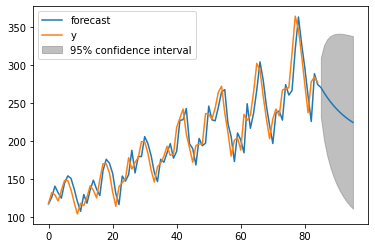

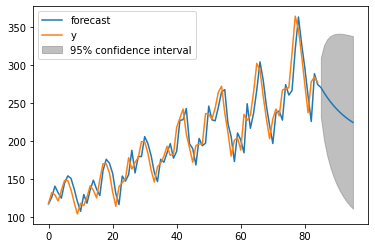

In [98]:
# fit model
model = ARIMA(X, order = (1, 0, 1))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 10)[0]
model_fit.plot_predict(1,96)

In [99]:
# Error on the test data
val = pd.read_excel('validation.xlsx', header = 0, index_col = 0, parse_dates = True)
X = train.values
X = X.astype('float32')

In [100]:
model = ARIMA(X, order = (1,0,1))
model_fit = model.fit()

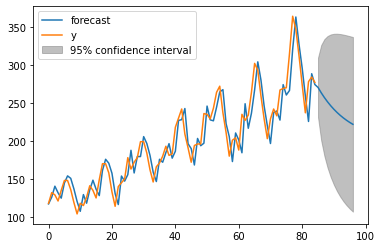

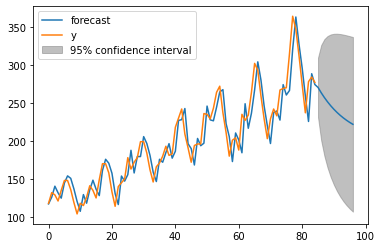

In [101]:
forcast = model_fit.forecast(steps = 10)[0]
model_fit.plot_predict(1,97)

In [102]:
forecast

array([270.35997109, 263.39155179, 257.09672144, 251.41036886,
       246.27367671, 241.63351311, 237.44188208, 233.65542706,
       230.2349825 , 227.14516868])